<div class="alert alert-info">
<H2> Capstone 1 Predictive Maintenance </H2>
<H3> Data Understanding </H3>
    
Data Features:
    <ol>
        <li>___Initial Data Collection Report___: The Data Collection Report is a simple listing of the data sources acquired along with their locations, the procedures used to procure them and any difficulties encountered. This section will will aid both with future replication of this project and with the execution of similar future projects.</li>
        <li>___Data Description Report___: The Data Description report describes the data that has been procured including its format, quantity: for example, the count of records and fields in each table, the characteristics of the “fields,” and any other surface characteristics discovered. Here is where I have evaluated whether or not the data acquired satisfies the analysis requirements.</li>
        <li>___Exploratory Data Analysis (EDA)___: EDA describes the results of exploring the data involved in this project. EDA includes the first findings and or initial hypothesis and their impact on the remainder of this project. I have also included graphs and plots to indicate data characteristics that suggest further examination and analysis of new data subsets.</li>
        <li>___Data Quality Report___: The Data Quality report lists the results of the data quality verification along with solutions vetted by subject matter experts to data quality.</li>
     </ol>
    
Note:
<p>
At this moment, the organization has no plans to procure external databases or invest in dispatching teams to each site as its engineers, analysts, and managers are busy managing the data they currently have. At some point, however, they might want to consider an extended deployment of data mining results, in which case purchasing additional IT infrastructure to capture sensor data not centrally registered may be quite useful. It may also be helpful to have demographic information to see how the maintainers across regions vary in skill set and maintenance practices.
</p>

<div class="alert alert-success">
<H3> Step 1. Initial Data Collection Report </H3>
    The dataset was put together by the Grouplens research group at the University of Minnesota. It comprises 1, 10, and 20 million ratings. And can be found at https://grouplens.org/datasets/movielens/. The following Data Collection Report is a simple listing of the data sources acquired along with their locations, the procedures used to procure them, and any difficulties encountered. This section will aid both with future replication of this project and with the execution of similar future projects.

Data Collection:

1.	Data Source: MovieLens (
2.	Location: https://grouplens.org/datasets/movielens/
3.	Movie Ratings: Small: 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018
4.	Method: This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.
a.	Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.
b.	The data are contained in the files links.csv, movies.csv, ratings.csv and tags.csv. More details about the contents and use of all these files follows.
c.	This and other GroupLens data sets are publicly available for download at http://grouplens.org/datasets/.
5.	Obstacles: This is a development dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available benchmark datasets if that is your intent.
    
    
Movie Ids
Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL https://movielens.org/movies/1). Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

Ratings Data File Structure (ratings.csv)
All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

<div class="alert alert-success">
<H3> Step 2. Data Description Report </H3>

In [52]:
# imports
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML

# settings
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# data viz imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df1_movies = pd.read_csv('Data/movies.csv')
df1_ratings = pd.read_csv('Data/ratings.csv')

In [53]:
# print basic info on movie data files to see what the exports look like
print(df1_movies.info())
print(df1_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [54]:
# print basic info on movie data files to see what the exports look like
print(df1_movies.head())
print(df1_ratings.head())

   movieId                               title                                       genres
0        1                    Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2                      Jumanji (1995)                   Adventure|Children|Fantasy
2        3             Grumpier Old Men (1995)                               Comedy|Romance
3        4            Waiting to Exhale (1995)                         Comedy|Drama|Romance
4        5  Father of the Bride Part II (1995)                                       Comedy
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [55]:
# start with this file as it lists: userID, movieID, rating, and timestamp
df1_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [56]:
# to pull in the titles of the movie instead of just the IDs. Let’s look at the movie titles and merge it into this dataset.
df1_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
# merge the movies and ratings dataframe into one
df1_main = pd.merge(df1_movies, df1_ratings, on='movieId')
df1_main.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [58]:
# convert pandas data frame value from unix timestamp to python datetime
df1_main.timestamp = pd.to_datetime(df1_main['timestamp'], unit='s')
df1_main.timestamp = df1_main.timestamp.dt.tz_localize('UTC')
df1_main.timestamp = df1_main['timestamp'].dt.date
df1_main.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18


In [59]:
users = df1_main['userId'].unique() #list of all users
movies = df1_main['movieId'].unique() #list of all movies

In [60]:
print("Number of users: " + str(users.shape))
print("Number of movies: " + str(movies.shape))

Number of users: (610,)
Number of movies: (9724,)


In [19]:
# check whether there are any missing values and work on them: machine learning models cannot work well with nulls
df1_main.isnull().sum()/df1_main.isnull().count()

movieId      0.0
title        0.0
genres       0.0
userId       0.0
rating       0.0
timestamp    0.0
dtype: float64

In [20]:
# let’s now create a dataframe with the average rating for each movie. 
#We are going to use these ratings to calculate the correlation between the movies later.
avg_ratings = pd.DataFrame(df1_main.groupby('title')['rating'].mean())
avg_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [21]:
# let’s now add a feature to the dataframe with the number of ratings for each movie. 
#This is important so that we can see the relationship between the average rating of a movie and the number of ratings the movie got. 
#It is important to ensure that lopsided ratings do not skew our results i.e. movies with one number of rating @ 5-stars. 
#To offset these instances we will need to set a reasonable threshold for the minimum number of ratings
avg_ratings['number_of_ratings'] = df1_main.groupby('title')['rating'].count()
avg_ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [22]:
# get a quick glimpse of the dataframe
avg_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9719 entries, '71 (2014) to À nous la liberté (Freedom for Us) (1931)
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             9719 non-null   float64
 1   number_of_ratings  9719 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 227.8+ KB


<div class="alert alert-success">
<H3> Step 3. Exploratory Data Analysis (EDA) </H3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184ADBE5FC8>,
      dtype=object)

<Figure size 576x432 with 0 Axes>

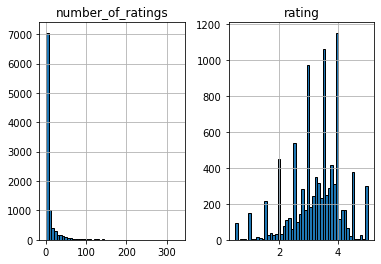

In [23]:
# let’s now plot a Histogram to visualize the distribution of the ratings
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
avg_ratings[['rating', 'number_of_ratings']].hist(bins=50)

Text(0.5, 0, 'Total movies individual users have rated')

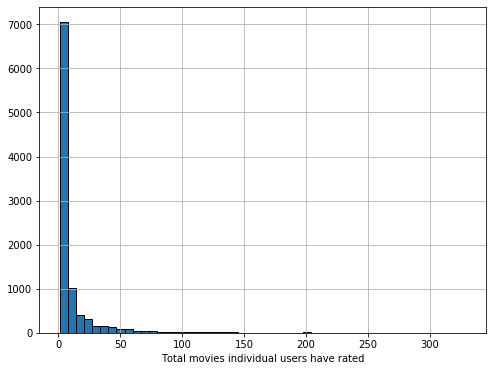

In [24]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
avg_ratings['number_of_ratings'].hist(bins=50)
plt.xlabel('Total movies individual users have rated')

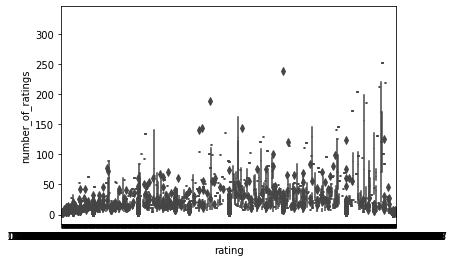

In [25]:
# the below chart shows that a good cutoff mark is at 50 number_of_ratings
sns.boxplot(avg_ratings['rating'], avg_ratings['number_of_ratings'])

In [26]:
# we can see that most of the movies were rated between 2 and 4.5. with most movies having between zero and fifty ratings. 
#Famous movies appear to have skewed the results as a mass of people frequently rated what they have viewed

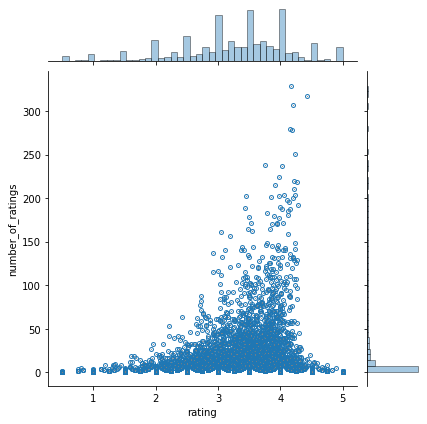

In [27]:
#Let’s now visualize the relationship between the rating of a movie and the number_of_ratings. 
#We do this by creating a jointplot using seaborn. 
sns.jointplot(x='rating', y='number_of_ratings', data=avg_ratings, s=1, facecolor='0.5', lw = 4)

In [28]:
# from the plot we can see that there is a positive relationship between the average rating of a movie and the number of ratings. 
#The graph indicates that the more the ratings a movie gets the higher the average rating it also receives. 
#This is important to note especially when choosing the threshold for the number of ratings per movie.

In [29]:
# lets unstack the movie titles into the columns by using the pivot_table function to see which users have rated which movies.
table = df1_main.pivot_table(index='userId', columns='title', values='rating')
table.shape

(610, 9719)

In [31]:
# lets get a quick glimps at the matrix we just built
table.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Hours (2016),13 Sins (2014),13 Tzameti (2005),13th (2016),"13th Warrior, The (1999)",1408 (2007),1492: Conquest of Paradise (1992),15 Minutes (2001),16 Blocks (2006),17 Again (2009),1776 (1972),18 Again! (1988),187 (One Eight Seven) (1997),1900 (Novecento) (1976),1941 (1979),1969 (1988),1984 (Nineteen Eighty-Four) (1984),2 Days in New York (2012),2 Days in Paris (2007),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2 Guns (2013),20 Dates (1998),20 Feet from Stardom (Twenty Feet from Stardom) (2013),20 Million Miles to Earth (1957),"20,000 Days on Earth (2014)","20,000 Leagues Under the Sea (1916)","20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001 Maniacs (2005),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),2046 (2004),2048: Nowhere to Run (2017),21 (2008),21 Grams (2003),21 Jump Street (2012),21 Up (1977),21 and Over (2013),22 Jump Street (2014),24 Hour Party People (2002),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Up (1985),28 Weeks Later (2007),3 Days to Kill (2014),3 Extremes (Three... Extremes) (Saam gaang yi) (2004),3 Idiots (2009),3 Ninjas (1992),3 Ninjas Kick Back (1994),3 Ninjas Knuckle Up (1995),3 Ninjas: High Noon On Mega Mountain (1998),3 Women (Three Women) (1977),3 dev adam (Three Giant Men) (1973),3-Iron (Bin-jip) (2004),30 Days of Night (2007),30 Minutes or Less (2011),300 (2007),3000 Miles to Graceland (2001),300: Rise of an Empire (2014),31 (2016),35 Up (1991),"39 Steps, The (1935)",3:10 to Yuma (1957),3:10 to Yuma (2007),4 Little Girls (1997),"4 Months, 3 Weeks and 2 Days (4 luni, 3 saptamâni si 2 zile) (2007)",40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",42 (2013),42 Up (1998),42nd Street (1933),47 Ronin (2013),48 Hrs. (1982),49 Up (2005),5 Centimeters per Second (Byôsoku 5 senchimêtoru) (2007),5 to 7 (2014),"5,000 Fingers of Dr. T, The (1953)",50 First Dates (2004),50/50 (2011),52 Pick-Up (1986),54 (1998),6 Days to Air: The Making of South Park (2011),61* (2001),"6th Day, The (2000)","6th Man, The (Sixth Man, The) (1997)",7 Days in Hell (2015),7 Faces of Dr. Lao (1964),"7th Voyage of Sinbad, The (1958)",8 1/2 (8½) (1963),8 Heads in a Duffel Bag (1997),8 Mile (2002),8 Seconds (1994),8 Women (2002),8 ½ Women (a.k.a. 8 1/2 Women) (a.k.a. Eight and a Half Women) (1999),800 Bullets (800 Balas) (2002),84 Charing Cross Road (1987),8MM (1999),9 (2009),9 1/2 Weeks (Nine 1/2 Weeks) (1986),9/11 (2002),96 Minutes (2011),964 Pinocchio (1991),99 francs (2007),9to5: Days in Porn (a.k.a. 9 to 5: Days in Porn) (2008),A Bad Moms Christmas (2017),A Christmas Story Live! (2017),A Cosmic Christmas (1977),A Detective Story (2003),A Dog's Purpose (2017),A Flintstones Christmas Carol (1994),A German Life (2016),A Home at the End of the World 

In [32]:
# Next let’s look at the most rated movies and choose two of them to work with in this simple recommender system. 
#We use pandas sort_values utility and set ascending to false in order to arrange the movies from the most rated. 
#We then use the head() function to view the top 10.
avg_ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [33]:
# Let’s assume that a user has watched: Forrest Gump (1994) and Shawshank Redemption, The (1994). 
#The goal is to look for movies that are similar to Forrest Gump (1994) and Shawshank Redemption, The (1994) in which we shall recommend to this user. 
#We can achieve this by computing the correlation between these two movies’ ratings and the ratings of the rest of the movies in the dataset. 
#The first step is to create a dataframe with the ratings of these movies from our movie_matrix: table.
forrestgump_rating = table['Forrest Gump (1994)']
shawshank_rating = table['Shawshank Redemption, The (1994)']

print([forrestgump_rating.head(10), shawshank_rating.head(10)])

[userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64, userId
1     NaN
2     3.0
3     NaN
4     NaN
5     3.0
6     5.0
7     NaN
8     5.0
9     NaN
10    NaN
Name: Shawshank Redemption, The (1994), dtype: float64]


In [34]:
# lets get the correlation between each movie's rating and the ratings for Forrest Gump (1994): similar_to_forrestgump. 
#Corrwith computes the pairwise correlation of rows or columns of two dataframe objects. 
similar_to_forrestgump = table.corrwith(forrestgump_rating)
similar_to_forrestgump.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.197712
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.234095
*batteries not included (1987)             0.892710
dtype: float64

In [35]:
# lets get the correlation between each movie's rating and the ratings for Forrest Gump (1994) with nans dropped: corr_forrestgump.
corr_forrestgump = pd.DataFrame(similar_to_forrestgump, columns=['correlation'])
corr_forrestgump.dropna(inplace=True)
corr_forrestgump.head()

,correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [36]:
# lets get the correlation between each movie's rating and the ratings for Shawshank Redemption, The (1994): similar_to_shawshank. 
similar_to_shawshank = table.corrwith(shawshank_rating)
similar_to_shawshank.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.419543
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.249580
*batteries not included (1987)             0.404520
dtype: float64

In [37]:
# lets get the correlation between each movie's rating and the ratings for Forrest Gump (1994) with nans dropped: corr_shawshank.
corr_shawshank = pd.DataFrame(similar_to_shawshank, columns=['correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

,correlation
title,
"'burbs, The (1989)",0.419543
(500) Days of Summer (2009),0.249580
*batteries not included (1987),0.404520
...And Justice for All (1979),-1.000000
10 Cloverfield Lane (2016),0.145671


In [38]:
# These two dataframes above show us the movies that are most similar to Forrest Gump (1994) and Shawshank Redemption, The (1994) respectively. 
#However we have a challenge in that some of the movies have very few ratings and may end up skewing the data with high actual ratings and number of ratings. 
#We can fix this by setting a threshold for the number of ratings. From the histogram earlier we saw a sharp decline in number of ratings after 100.
#It would probably be safe to exclude these observations until further data is collected: this number can certainly be adjusted as you wish!

In [39]:
# to analyze skewed areas (low number of ratings) we need to join the two dataframes: correllation with the number_of_ratings column in the ratings dataframe.
corr_forrestgump = corr_forrestgump.join(avg_ratings['number_of_ratings'])
corr_shawshank = corr_shawshank.join(avg_ratings['number_of_ratings'])
print(corr_forrestgump.head())
print(corr_shawshank.head())

                                correlation  number_of_ratings
title                                                         
'burbs, The (1989)                 0.197712                 17
(500) Days of Summer (2009)        0.234095                 42
*batteries not included (1987)     0.892710                  7
...And Justice for All (1979)      0.928571                  3
10 Cent Pistol (2015)             -1.000000                  2
                                correlation  number_of_ratings
title                                                         
'burbs, The (1989)                 0.419543                 17
(500) Days of Summer (2009)        0.249580                 42
*batteries not included (1987)     0.404520                  7
...And Justice for All (1979)     -1.000000                  3
10 Cloverfield Lane (2016)         0.145671                 14


In [40]:
# We shall now obtain the movies that are most similar to Forrest Gump (1994) by limiting them to movies that have are between 20 and 100
#We then sort them by the correlation column and view the first 10.
corr_forrestgump[corr_forrestgump['number_of_ratings'].between(20, 100, inclusive = True)].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Bio-Dome (1996),0.723238,31
Thor: The Dark World (2013),0.715809,21
Oblivion (2013),0.708827,20
Fatal Attraction (1987),0.701856,36
X-Men: Days of Future Past (2014),0.682284,30
National Lampoon's Vacation (1983),0.677043,26
Easy A (2010),0.670081,27
"Last King of Scotland, The (2006)",0.663947,20
Bridesmaids (2011),0.663176,21


In [41]:
# We shall now obtain the movies that are most similar to Shawshank Redemption, The (1994) by limiting them to movies that have are between 20 and 100
#We then sort them by the correlation column and view the first 10.
corr_shawshank[corr_shawshank['number_of_ratings'].between(20, 100, inclusive = True)].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Twilight (2008),0.845184,22
Moonstruck (1987),0.753878,27
Intouchables (2011),0.744396,37
Grumpy Old Men (1993),0.730972,29
"Secret Life of Walter Mitty, The (2013)",0.693159,20
Muriel's Wedding (1994),0.666667,33
Wonder Boys (2000),0.662047,22
Midnight in Paris (2011),0.621372,25
Wallace & Gromit: A Close Shave (1995),0.619625,48


In [42]:
# We shall now obtain the movies that are most similar to Edge of Tomorrow (2014) by limiting them to movies that have are between 20 and 100
#We then sort them by the correlation column and view the first 10.

# step 1. get movies ratings: XXX_rating
edge2014_rating = table['Edge of Tomorrow (2014)']

# step 2. find movies correlated with moive: similar_to_XXX
similar_to_edge2014 = table.corrwith(edge2014_rating)
corr_edge2014 = pd.DataFrame(similar_to_edge2014, columns=['correlation'])
corr_edge2014.dropna(inplace=True)

# step 3. join ratings with correllations
corr_edge2014 = corr_edge2014.join(avg_ratings['number_of_ratings'])

# step 4. obtain the movies that are most similar to XXX
corr_edge2014[corr_edge2014['number_of_ratings'].between(25, 75, inclusive = True)].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Dune (1984),1.0,37
Thelma & Louise (1991),1.0,41
"Philadelphia Story, The (1940)",1.0,29
"Mighty Ducks, The (1992)",1.0,26
Edge of Tomorrow (2014),1.0,44
Searching for Bobby Fischer (1993),1.0,40
"Killing Fields, The (1984)",1.0,28
Deliverance (1972),1.0,30
"Doors, The (1991)",1.0,37


In [43]:
max = avg_ratings['number_of_ratings'].max()
min = avg_ratings['number_of_ratings'].min()
len = len(avg_ratings)

print([max, min, len])

[329, 1, 9719]


In [44]:
cols = list(avg_ratings.columns)

# now iterate over the remaining columns and create a new zscore column (outliers will be discluded +/- 1.96)
for col in cols:
    col_zscore = col + '_zscore'
    avg_ratings[col_zscore] = (avg_ratings[col] - avg_ratings[col].mean())/avg_ratings[col].std(ddof=0)

In [45]:
avg_ratings.head(10)

,rating,number_of_ratings,rating_zscore,number_of_ratings_zscore
title,,,,
'71 (2014),4.000000,1,0.847870,-0.418438
'Hellboy': The Seeds of Creation (2004),4.000000,1,0.847870,-0.418438
'Round Midnight (1986),3.500000,2,0.273130,-0.373806
'Salem's Lot (2004),5.000000,1,1.997349,-0.418438
'Til There Was You (1997),4.000000,2,0.847870,-0.373806
'Tis the Season for Love (2015),1.500000,1,-2.025830,-0.418438
"'burbs, The (1989)",3.176471,17,-0.098761,0.295686
'night Mother (1986),3.000000,1,-0.301610,-0.418438
(500) Days of Summer (2009),3.666667,42,0.464710,1.411505


In [46]:
# exported to .csv for testing
df1_main.to_csv(r'Data/phaseII_cleaned.csv', index = None, header=True)